In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import os
os.chdir("/content/drive/My Drive") 


In [ ]:
df = pd.read_csv('mustardoil.csv')
df.head()

,Date,Centre_Name,Commodity_Name,Price
0,03-01-00,DELHI,Mustard Oil (Packed),48.0
1,03-01-00,SHIMLA,Mustard Oil (Packed),61.5
2,03-01-00,LUCKNOW,Mustard Oil (Packed),34.0
3,03-01-00,AHMEDABAD,Mustard Oil (Packed),31.0
4,03-01-00,BHOPAL,Mustard Oil (Packed),38.0


In [ ]:
df["Centre_Name"].unique()


array(['DELHI', 'SHIMLA', 'LUCKNOW', 'AHMEDABAD', 'BHOPAL', 'MUMBAI',
       'JAIPUR', 'PATNA', 'BHUBANESHWAR', 'KOLKATA', 'GUWAHATI',
       'SHILLONG', 'AIZWAL', 'AGARTALA', 'BENGALURU', 'T.PURAM',
       'CHENNAI', 'HYDERABAD', 'CHANDIGARH', 'SRINAGAR', 'JAMMU',
       'AMRITSAR', 'LUDHIANA', 'DEHRADUN', 'RAIPUR', 'RANCHI', 'KOHIMA',
       'KANPUR', 'RAJKOT', 'VIJAYWADA', 'DINDIGUL', 'HISAR', 'KARNAL',
       'MANDI', 'BATHINDA', 'VARANASI', 'AGRA', 'INDORE', 'NAGPUR',
       'JODHPUR', 'KOTA', 'BHAGALPUR', 'CUTTACK', 'SAMBALPUR', 'SILIGURI',
       'ITANAGAR', 'DIMAPUR', 'DHARWAD', 'THIRUCHIRAPALLI', 'ERNAKULAM',
       'PORT BLAIR', 'PUDUCHERRY', 'PANAJI', 'GWALIOR', 'JABALPUR',
       'KOZHIKODE', 'ROURKELA', 'VISAKHAPATNAM', 'PANCHKULA', 'GURGAON',
       'REWA', 'SAGAR', 'COIMBATORE', 'TIRUNELVELI', 'PURNIA', 'THRISSUR',
       'PALAKKAD', 'WAYANAD', 'HALDWANI', 'DHARAMSHALA', 'MANGALORE',
       'MYSORE'], dtype=object)

In [ ]:
n = len(pd.unique(df['Centre_Name']))
  
print("No.of.unique Centres :", 
      n)

No.of.unique Centres : 72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118631 entries, 0 to 118630
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            118631 non-null  object 
 1   Centre_Name     118631 non-null  object 
 2   Commodity_Name  118631 non-null  object 
 3   Price           96797 non-null   float64
dtypes: float64(1), object(3)
memory usage: 3.6+ MB


In [ ]:
df.Date=pd.to_datetime(df.Date,dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118631 entries, 0 to 118630
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            118631 non-null  datetime64[ns]
 1   Centre_Name     118631 non-null  object        
 2   Commodity_Name  118631 non-null  object        
 3   Price           96797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.6+ MB


In [ ]:
df1 = df[df['Centre_Name'] == "AMRITSAR"] 
df1.head()

,Date,Centre_Name,Commodity_Name,Price
29361,2006-08-17,AMRITSAR,Mustard Oil (Packed),64.0
29405,2006-08-21,AMRITSAR,Mustard Oil (Packed),58.0
29431,2006-08-22,AMRITSAR,Mustard Oil (Packed),67.0
29457,2006-08-23,AMRITSAR,Mustard Oil (Packed),58.0
29483,2006-08-24,AMRITSAR,Mustard Oil (Packed),58.0


In [ ]:
df1=df1.drop(["Commodity_Name","Centre_Name"],axis=1)


In [ ]:
# Check if any dates are missing
daily_data = pd.DataFrame(pd.date_range(start=df1['Date'].min(),end=df1['Date'].max()))
daily_data.rename(columns={ daily_data.columns[0]: "Date" }, inplace = True)
daily_data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


,Date
count,3177
unique,3177
top,2009-10-28 00:00:00
freq,1
first,2006-08-17 00:00:00
last,2015-04-28 00:00:00


In [ ]:
# Add the missing dates
df2 = pd.merge(df1,daily_data,on='Date',how='outer')
df2 = df2.sort_values(by=['Date'])
df2.head(10)

,Date,Price
0,2006-08-17,64.0
2092,2006-08-18,NaN
2093,2006-08-19,NaN
2094,2006-08-20,NaN
1,2006-08-21,58.0
2,2006-08-22,67.0
3,2006-08-23,58.0
4,2006-08-24,58.0
2095,2006-08-25,NaN
2096,2006-08-26,NaN


In [ ]:
#Using linear interpolation to fill up nulls
df3 = df2.interpolate(method='linear', axis=0).ffill().bfill()

df3.head(10)

,Date,Price
0,2006-08-17,64.000
2092,2006-08-18,62.500
2093,2006-08-19,61.000
2094,2006-08-20,59.500
1,2006-08-21,58.000
2,2006-08-22,67.000
3,2006-08-23,58.000
4,2006-08-24,58.000
2095,2006-08-25,57.375
2096,2006-08-26,56.750


In [ ]:
#Using spline interpolation to fill up nulls
df4=df2.interpolate(method='spline', order=2)
df4.head(10)
df.count()

Date              118631
Centre_Name       118631
Commodity_Name    118631
Price              96797
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


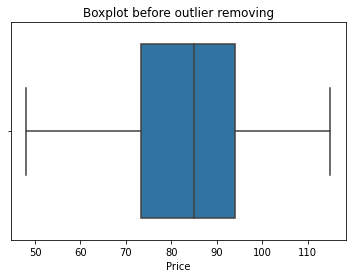

In [ ]:
from matplotlib import pyplot as plt
sns.boxplot(df3["Price"])
plt.title("Boxplot before outlier removing")
plt.show()

In [ ]:
df3.isna().sum()
df3.count()

Date     3177
Price    3177
dtype: int64

In [ ]:
df3.set_index("Date",inplace=True)
df3.head(20)

,Price
Date,
2006-08-17,64.000
2006-08-18,62.500
2006-08-19,61.000
2006-08-20,59.500
2006-08-21,58.000
2006-08-22,67.000
2006-08-23,58.000
2006-08-24,58.000
2006-08-25,57.375


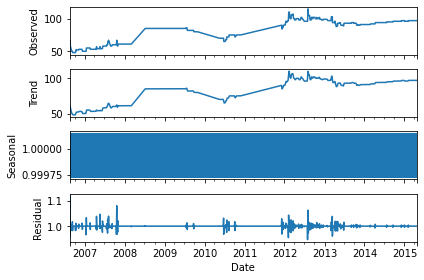

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose


analysis = df3['Price'].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

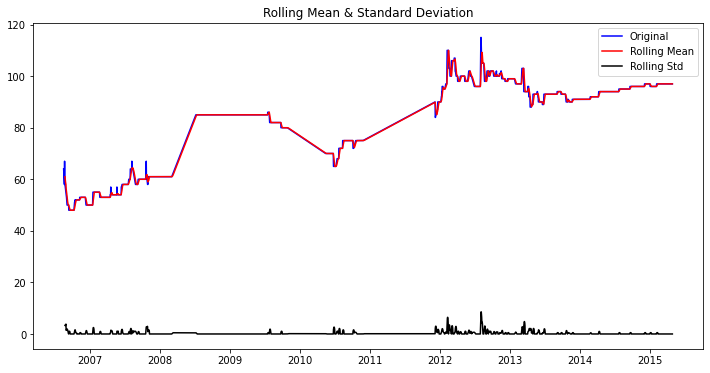

Results of Dickey-Fuller Test:
Test Statistic                   -2.014302
p-value                           0.280338
#Lags Used                       28.000000
Number of Observations Used    3148.000000
Critical Value (1%)              -3.432429
Critical Value (5%)              -2.862459
Critical Value (10%)             -2.567259
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
# Calculate rolling statistics
rolmean = df3.rolling(window = 8, center = False).mean()
rolstd = df3.rolling (window = 8, center = False).std()
# Perform the Dickey Fuller Test
dftest = adfuller(df3['Price']) # change the value column as required
#PLot rolling statistics:
fig = plt.figure(figsize=(12,6))
orig = plt.plot(df3, color='blue', label='Original')
mean = plt.plot(rolmean, color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt. title('Rolling Mean & Standard Deviation')
plt.show(block=False)
# Print Dickey-Fuller test results
print ('Results of Dickey-Fuller Test:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used' ])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s) '%key] = value
print (dfoutput)

In [ ]:
df3_diff=df3.diff(periods=4).dropna()

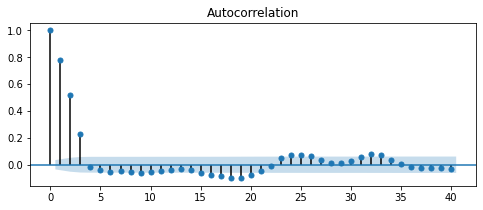

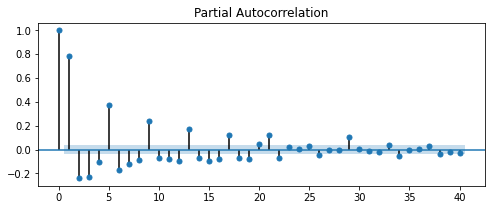

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig,ax=plt.subplots(figsize=(8,3))
plot_acf(df3_diff,ax=ax,lags=40);

fig,ax=plt.subplots(figsize=(8,3))
plot_pacf(df3_diff,ax=ax,lags=40);


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(df3.Price, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 3176
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2745.778
Method:                       css-mle   S.D. of innovations              0.574
Date:                Sun, 23 Jan 2022   AIC                           5499.555
Time:                        06:47:35   BIC                           5523.809
Sample:                    08-18-2006   HQIC                          5508.254
                         - 04-28-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0103      0.012      0.865      0.387      -0.013       0.034
ar.L1.D.Price     0.3490      0.094      3.712      0.000       0.165       0.533
ma.L1.D.Price    -0.2404      0.096     

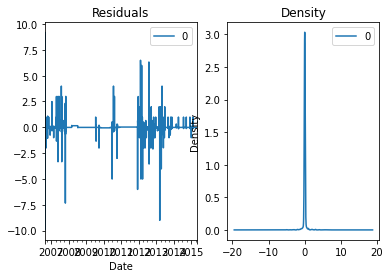

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

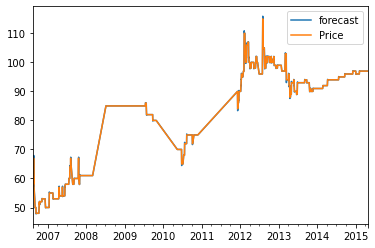

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df3.Price[:2700]
test = df3.Price[2700:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


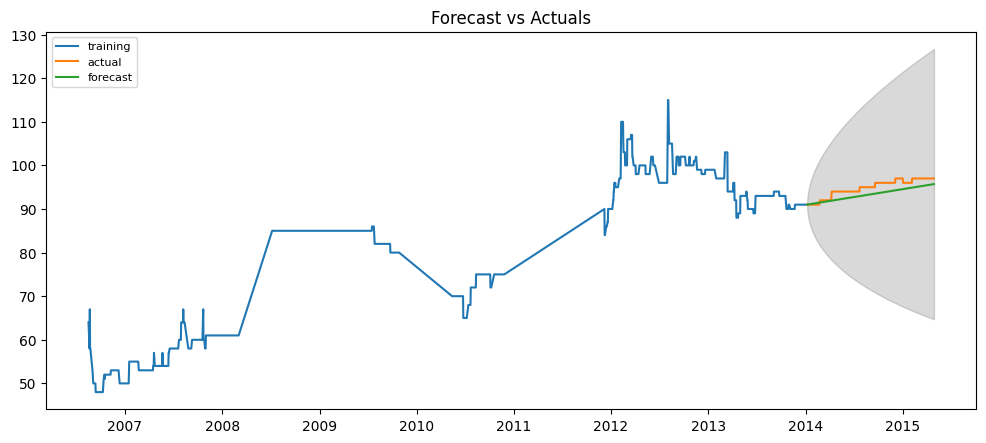

In [ ]:
# Build Model
model = ARIMA(train, order=(1,1,1))  
  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(477, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


In [ ]:
forecast_accuracy(fc, test.values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.9840033700597396,
 'corr': 0.947058074679376,
 'mae': 1.490381029272898,
 'mape': 0.015602857188591054,
 'me': -1.4454655374795926,
 'minmax': 0.015602039343434071,
 'mpe': -0.01510930203745641,
 'rmse': 1.644783481767482}

In [ ]:
print(fc_series)

Date
2014-01-07    91.008470
2014-01-08    91.017858
2014-01-09    91.027566
2014-01-10    91.037387
2014-01-11    91.047248
                ...    
2015-04-24    95.671890
2015-04-25    95.681772
2015-04-26    95.691654
2015-04-27    95.701536
2015-04-28    95.711417
Length: 477, dtype: float64
